In [433]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm

from IPython import display


In [423]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\Counties35-45_041018.csv')

In [424]:
data.columns

Index(['APINO', 'COMPANY', 'YR', 'JAN_OIL', 'JAN_GAS', 'JAN_WATER', 'JAN_DAYS',
       'FEB_OIL', 'FEB_GAS', 'FEB_WATER', 'FEB_DAYS', 'MAR_OIL', 'MAR_GAS',
       'MAR_WATER', 'MAR_DAYS', 'APR_OIL', 'APR_GAS', 'APR_WATER', 'APR_DAYS',
       'MAY_OIL', 'MAY_GAS', 'MAY_WATER', 'MAY_DAYS', 'JUN_OIL', 'JUN_GAS',
       'JUN_WATER', 'JUN_DAYS', 'JUL_OIL', 'JUL_GAS', 'JUL_WATER', 'JUL_DAYS',
       'AUG_OIL', 'AUG_GAS', 'AUG_WATER', 'AUG_DAYS', 'SEP_OIL', 'SEP_GAS',
       'SEP_WATER', 'SEP_DAYS', 'OCT_OIL', 'OCT_GAS', 'OCT_WATER', 'OCT_DAYS',
       'NOV_OIL', 'NOV_GAS', 'NOV_WATER', 'NOV_DAYS', 'DEC_OIL', 'DEC_GAS',
       'DEC_WATER', 'DEC_DAYS', 'API_RES', 'ResCode', 'Reservoir'],
      dtype='object')

In [425]:
D2 = data[['APINO', 'YR','JAN_OIL','FEB_OIL', 'MAR_OIL','APR_OIL', 'MAY_OIL','JUN_OIL', 'JUL_OIL','AUG_OIL','SEP_OIL','OCT_OIL',
      'NOV_OIL','DEC_OIL']]

In [426]:
masterDF = pd.DataFrame()
dfList = []
APIS = []
for well in D2.APINO.unique()[0:]:
    d3 = D2[D2['APINO'] == well][['JAN_OIL','FEB_OIL', 'MAR_OIL','APR_OIL', 'MAY_OIL','JUN_OIL', 'JUL_OIL','AUG_OIL','SEP_OIL','OCT_OIL',
      'NOV_OIL','DEC_OIL']].stack()
    #print(str(D2[D2['APINO'] == well].YR.min()))
    ind = pd.date_range(str(D2[D2['APINO'] == well].YR.min()), periods=len(D2[D2['APINO'] == well])*12, freq='M')
    ts = pd.Series(d3.values, index=ind)
    dfList.append(ts.to_frame(name=str(well)))
    APIS.append(well)
    #masterDF = pd.concat([masterDF, ts.to_frame(name=str(well))])
masterDF =  pd.concat(dfList, axis=1)

In [427]:
masterDF = pd.concat(dfList, axis=1).fillna(0)

In [498]:
well_locs = pd.read_csv(r'd:\wells.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [402]:
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == well][['latitude', 'longitude']].values)

100%|████████████████████████████████████████████████████████████████████████████████| 484/484 [13:54<00:00,  1.72s/it]


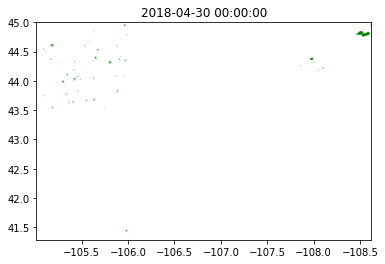

In [390]:
for i in tqdm(range(484)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(masterDF.iloc[i].values/np.max(np.max(masterDF))),
                alpha=0.5, c='g')
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.max(np.vstack(coords)[0:,1]),np.min(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(masterDF.index[i])
    plt.savefig('D:/fun/'+str(i)+'.png')

In [428]:
masterDF.iloc[0:484,0:].to_csv('C:\\Users\\jesse.pisel\\Downloads\\TTL_Prod041018\\35to45ts.csv')

In [436]:
path = r'C:\\Users\\jesse.pisel\\Downloads\\TTL_Prod041018\\timeseries\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed)

In [452]:
ts1 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts.csv', index_col=[0])
ts2 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts.csv', index_col=[0])
ts3 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts.csv', index_col=[0])
ts4 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts.csv', index_col=[0])

In [469]:
bigTS = pd.concat([ts1, ts2, ts3, ts4], axis=1)

In [490]:
APIS = bigTS.columns.values
type(APIS)

numpy.ndarray

In [499]:
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == int(well)][['latitude', 'longitude']].values)

In [ ]:
for i in tqdm(range(484)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTS.iloc[i].values/np.max(np.max(bigTS))),
                alpha=0.5, c='g', linewidths=0)
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(masterDF.index[i])
    
    plt.savefig('D:/fun/'+str(i)+'.png', dpi=100)

 96%|████████████████████████████████████████████████████████████████████████████▋   | 464/484 [18:49<00:48,  2.43s/it]